In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [96]:
# Load the dataset into a pandas dataframe.
filepath = '/raid/antoloui/Master-thesis/Data/Classification/cam_query_to_doctype.csv'
df = pd.read_csv(filepath, delimiter=',', index_col=0)

# Rename columns.
df.columns = ['Sentence', 'Class']

# Add categories ids column.
categories = df.Class.unique()  # Get the categories.
df['Class_id'] = df.apply(lambda row: np.where(categories == row.Class)[0][0], axis=1)

# Print details.
print('Number of training sentences: {}\n'.format(df.shape[0]))
print('Number of doc types: {:,}'.format(len(categories)))
for i, cat in enumerate(categories):
    print("  {} : {}".format(cat, i))
df.sample(10)

Number of training sentences: 55900

Number of doc types: 20
  Install & Upgrade Guides : 0
  Configuration (Guides, Examples & TechNotes) : 1
  Data Sheets : 2
  Release Notes : 3
  Maintain & Operate (Guides & TechNotes) : 4
  End User Guides : 5
  White Papers : 6
  Q&A : 7
  Technical References : 8
  Design (Guides & TechNotes) : 9
  Sales Resources : 10
  Command References : 11
  Compatibility Information : 12
  Main Pages : 13
  Product Literature : 14
  Troubleshooting (Guides & TechNotes) : 15
  Programming Guides : 16
  Feature Guides : 17
  License & Warranty : 18
  End-of-Life & End-of-Sale Notices : 19


,Sentence,Class,Class_id
52916,what is the Cisco Catalyst 9300,Release Notes,3
20858,cisco 4500x vss Version 03.06.03.E 15.1(1r),"Configuration (Guides, Examples & TechNotes)",1
9898,ASR 1000 Series: Packet Trace: Configuration E...,"Configuration (Guides, Examples & TechNotes)",1
47704,SNMP Server Commands on the Cisco IOS XR Softw...,"Configuration (Guides, Examples & TechNotes)",1
13626,Cat 3650: configure IP Routing,"Configuration (Guides, Examples & TechNotes)",1
38465,Intro to ISE,Data Sheets,2
18526,catalyst 4500 maximum vrf,"Configuration (Guides, Examples & TechNotes)",1
3842,3650 os,Data Sheets,2
48555,What are the benefits of Nexus 9300-GX switches​?,Data Sheets,2
32000,Dynamic Host Configuration Protocol (DHCP)/DHCPv6,"Configuration (Guides, Examples & TechNotes)",1


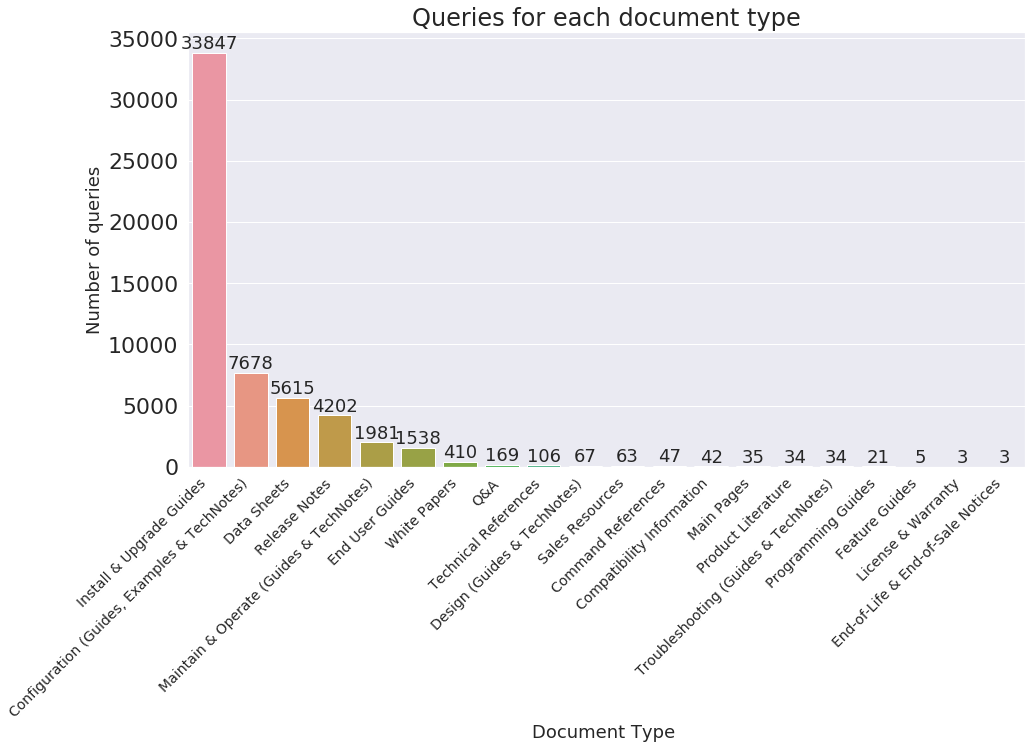

In [97]:
# Get the counts of each document type.
count = df['Class'].value_counts()
count_values = count.values.tolist()

# Create barplot.
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(categories, count_values)

# Rotate labels on x-axis.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# Set titles of plot and axes.
plt.title("Queries for each document type", fontsize=24)
plt.ylabel('Number of queries', fontsize=18)
plt.xlabel('Document Type ', fontsize=18)

#adding the count labels above rectangles.
rects = ax.patches
for rect, label in zip(rects, count_values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
    
# Show the plot.
plt.show()

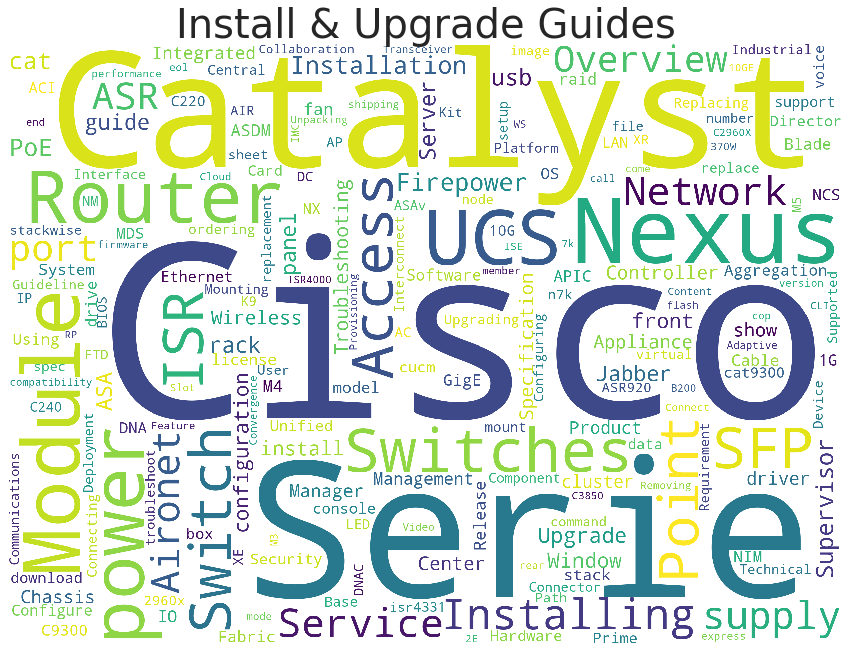

In [98]:
# Get all queries from 'Install & Upgrade Guides'
subset = df[df.Class=='Install & Upgrade Guides']
text = subset.Sentence.values

# Create Wordcloud.
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  collocations=False,
                  width=2500,
                  height=1800
                  ).generate(" ".join(text))
# Plot.
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Install & Upgrade Guides", fontsize=40)
plt.imshow(cloud)

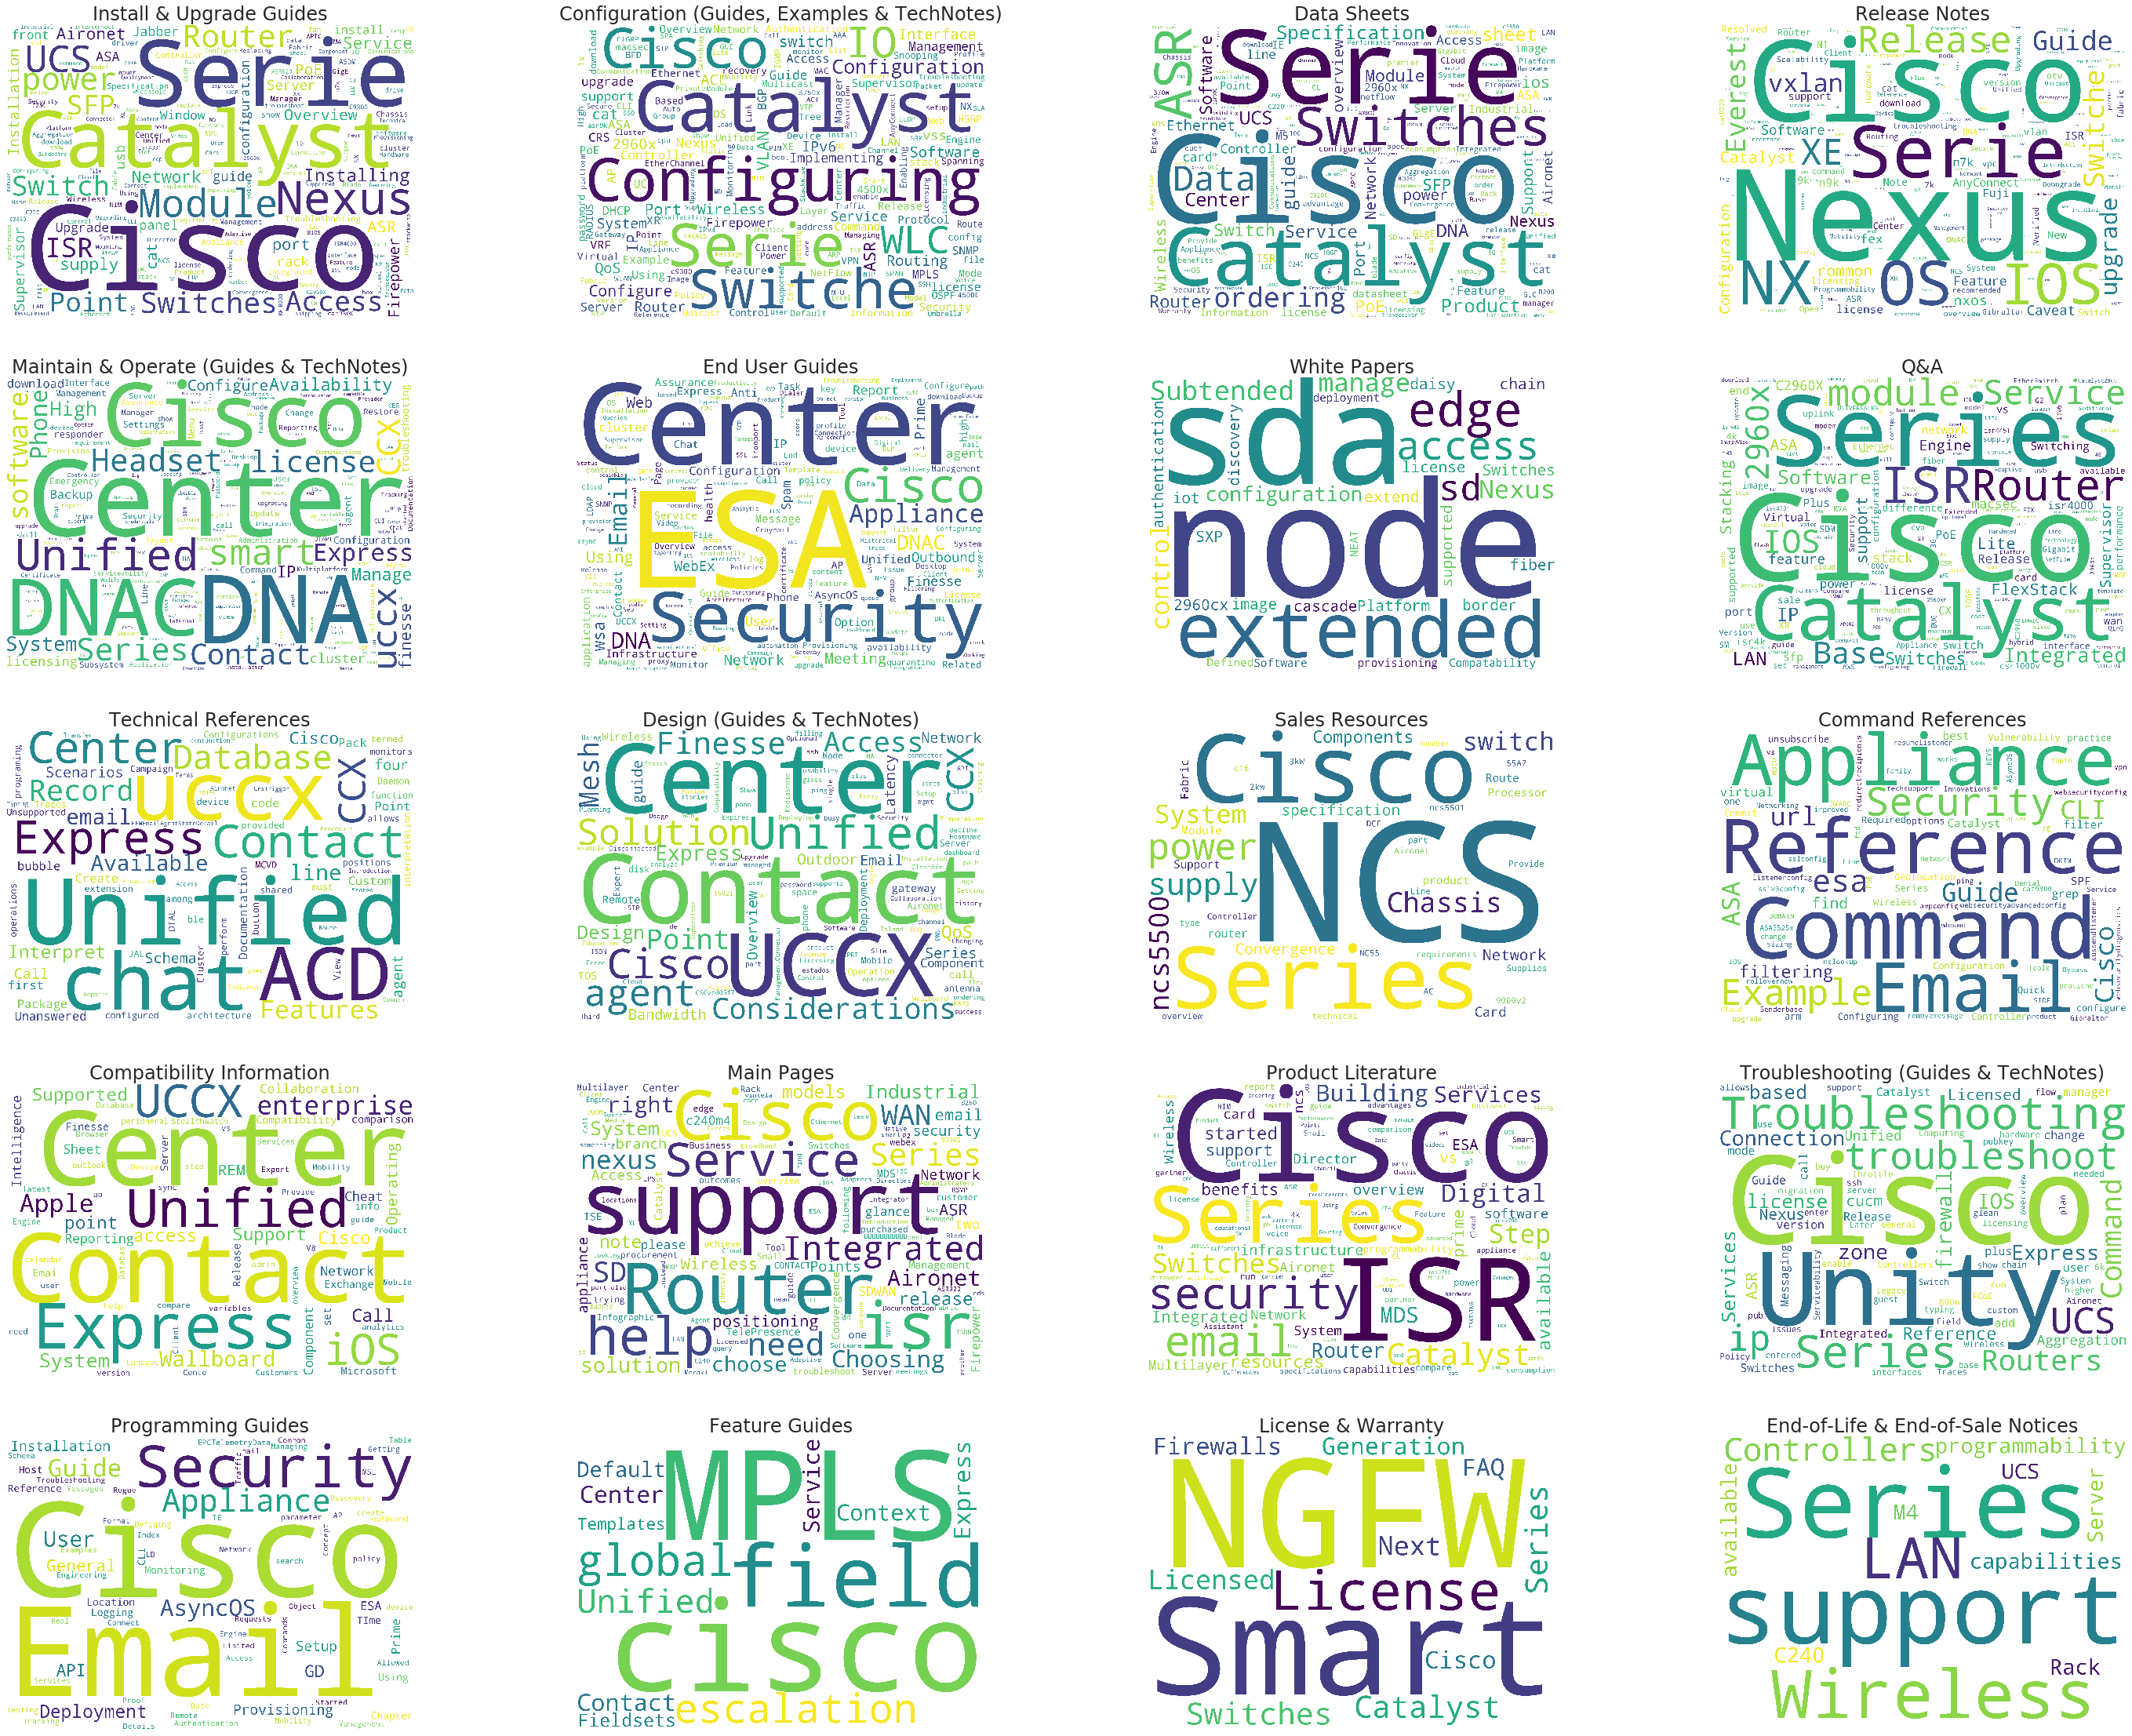

In [112]:
# Init figure.
height = 5
width = 4
fig, axarr = plt.subplots(height, width, figsize=(50,40))


# Draw plots.
for i, cat in enumerate(categories):
    
    # Get all queries from the category
    subset = df[df.Class==cat]
    text = subset.Sentence.values
    
    # Create Wordcloud.
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800
                      ).generate(" ".join(text))
    
    # Add subplot.
    if i%width==0:
        idx = i+1
    else:
        idx = i
    axarr[int(np.ceil(idx/width))-1, i%width].imshow(cloud)
    axarr[int(np.ceil(idx/width))-1, i%width].set_title(cat)
    axarr[int(np.ceil(idx/width))-1, i%width].axis('off')
    
plt.show()